In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

In [3]:
#from util import HISTORICAL_FILE
df = pd.read_excel(historical.xlsx, keep_default_na=False)
#reads projects from Excel file

len(df)
df.head()

NameError: name 'historical' is not defined

In [35]:
df.iloc[: , 2:].sum().sort_values(ascending=False)

MySQL                         69
Oracle                        58
Redis                         46
HBase                         39
Ehcache                       39
Impala                        38
PostgreSQL                    34
MongoDB                       32
Elasticsearch                 31
H2                            30
DynamoDB                      30
SapAdaptiveServer             28
Cassandra                     24
CouchDB                       24
MS SQL Server                 23
Solr                          20
GoogleCloudDatastore          20
SQLite                        20
Memcached                     19
MariaDB                       14
Cosmos BD                     10
Neo4j                         10
Informix                       1
Virtuoso-Sql                   0
Netezza                        0
GoogleBigQuery                 0
RiakKV                         0
Snowflake                      0
Aerospike                      0
InfluxDB                       0
PostGIS   

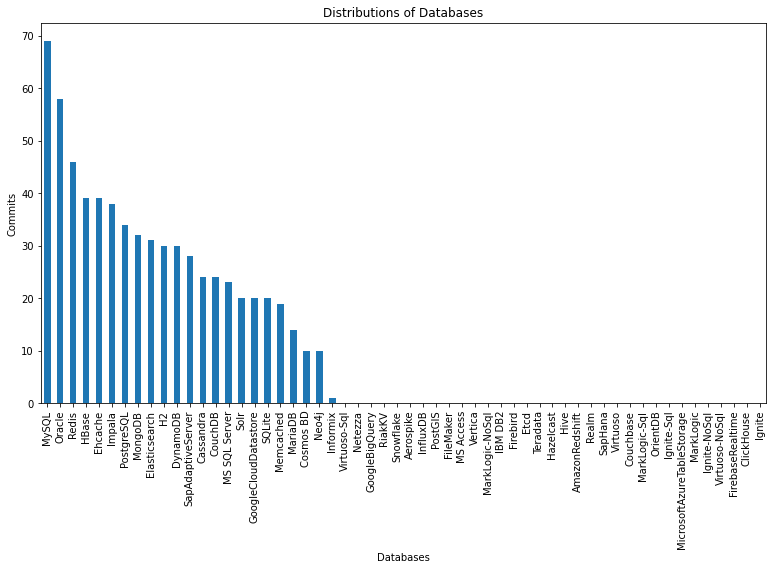

In [36]:
plt.figure(figsize=(13,7))
df.iloc[: , 2:].sum().sort_values(ascending=False).plot(kind='bar', title="Distributions of Databases")
plt.xlabel("Databases")
plt.ylabel("Commits")
plt.show()

In [37]:
#df2 = df 
df2 = df.groupby("PROJECTS").sum()
#df2 = df2["COMMITS"].sum().sort_values(ascending=False)
df2

,COMMITS,Ignite,PostGIS,Snowflake,MarkLogic-NoSql,Virtuoso-Sql,RiakKV,Informix,PostgreSQL,GoogleBigQuery,...,Realm,Ehcache,AmazonRedshift,MS SQL Server,Hive,Hazelcast,Teradata,Elasticsearch,Ignite-NoSql,Redis
PROJECTS,,,,,,,,,,,,,,,,,,,,,
Activiti,55,0,0,0,0,0,0,0,10,0,...,0,0,0,0,0,0,0,0,0,0
Arduino,55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bazel,55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
buck,55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
che,55,0,0,0,0,0,0,0,10,0,...,0,10,0,0,0,0,0,10,0,10
hadoop,55,0,0,0,0,0,0,0,0,0,...,0,10,0,10,0,0,0,0,0,0
kafka,55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pinpoint,55,0,0,0,0,0,0,1,4,0,...,0,9,0,3,0,0,0,1,0,6
processing,55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


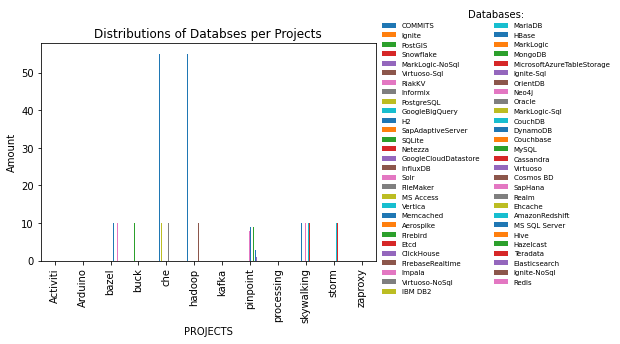

In [40]:
#plt.figure(size=(25,20))
#Melhorar este gráfico
df2.plot(kind='bar')
plt.legend(title = "Databases:", frameon=False, ncol=2, prop={'size': 7}, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Distributions of Databses per Projects")
plt.ylabel("Amount")
plt.show()

In [41]:
#Para apresentar quantos BDs apareceram por Projeto
def num_missing(x):
   return sum(x >= 1)-1
df2.apply(num_missing, axis=1)

PROJECTS
Activiti       4
Arduino        1
bazel          3
buck           1
che            9
hadoop         8
kafka          0
pinpoint      16
processing     1
skywalking    18
storm         10
zaproxy        2
dtype: int64

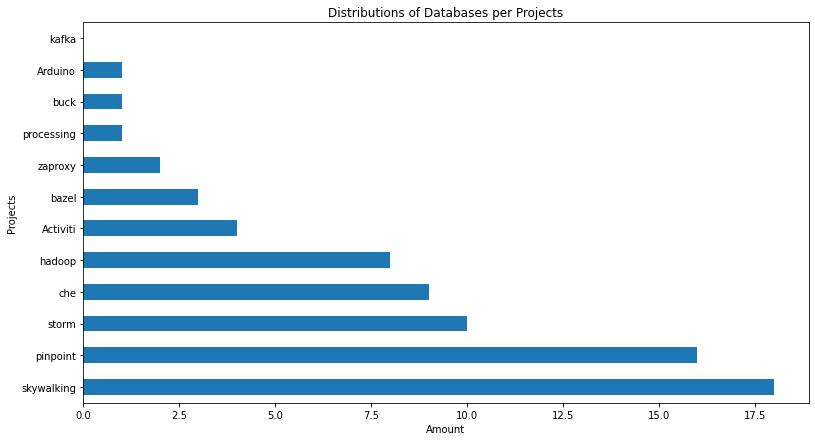

In [42]:
plt.figure(figsize=(13,7))
df2.apply(num_missing, axis=1).sort_values(ascending=False).plot(kind='barh', title = 'Distributions of Databases per Projects')
plt.xlabel("Amount")
plt.ylabel("Projects")
plt.show() 

In [43]:
#Para apresentar os projetos em que o indício de BD apareceu em todos os commits
def full_commits(x):
   return sum(x == 10)
df2.apply(full_commits, axis=1)

PROJECTS
Activiti       4
Arduino        1
bazel          3
buck           1
che            9
hadoop         8
kafka          0
pinpoint       0
processing     1
skywalking    18
storm         10
zaproxy        2
dtype: int64

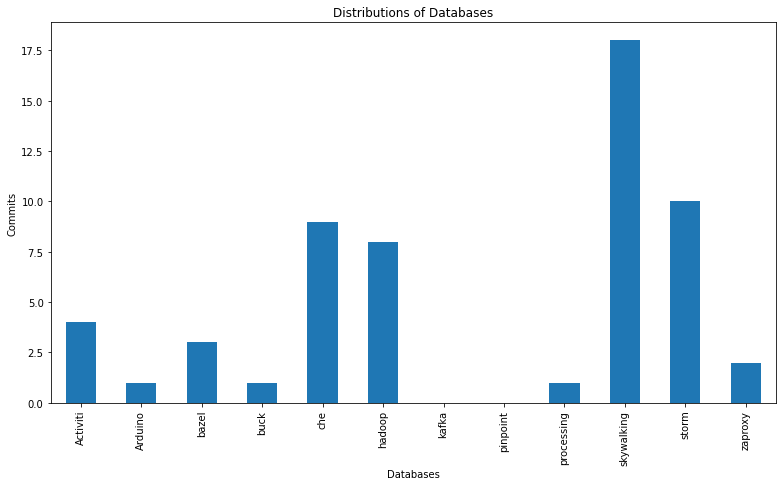

In [44]:
plt.figure(figsize=(13,7))
df2.apply(full_commits, axis=1).plot(kind='bar', title="Distributions of Databases")
plt.xlabel("Databases")
plt.ylabel("Commits")
plt.show()

In [45]:

#Não está trazendo os projetos que aparecem em parte dos commits
#Para apresentar os projetos em que o indício de BD apareceu em todos os commits
def less_commits(x):
   #return sum(x/10)
   return sum(x mod 10 )
df2.apply(less_commits, axis=1)

SyntaxError: invalid syntax (<ipython-input-45-54c41d08a709>, line 5)

In [ ]:
#Melhorar esta informação

#df.loc[: ,["PROJECTS","COMMITS"]].filter(lambda x: len(x) == 1)
#.value_counts(lambda x: len(x) == 1)
#.sum().sort_values(ascending=False)
#df.columns
#df2.sum()
#df.apply( lambda x : x == 1, axis=1)
#[df2.loc[: ,1:].sum().sort_values(ascending=False)]
#df2.loc[].sum().sort_values(ascending=False)

#(lambda x: len(x) >= 1)]
#dataframe[dataframe.valor <=20
#df.columns.get_value(series=1)
#df.COMMITS.
#df.COMMITS.sort_values(ascending=False)

#df.loc[:,[True]]
# Melhorar esta informação
#print (df2)

#df2.COMMITS.value_counts(lambda x: x == 1)
#df2.COMMITS.sum().sort_values(ascending=False)
#filter(lambda x: len(x) >= 18)
#len(df)
#df.Domains.value_counts()

In [24]:
#Ajuda Wagner, porém não funcionou

dados_excel = pd.read_excel("historical.xlsx")
#print(dados_excel)

#dados_excel = pd.read_excel(HISTORICAL_FILE)
colunas = list(dados_excel)
print (colunas[3:])
colunas[3:]
lista = ['Ignite', 'PostGIS',
 'Snowflake',
 'MarkLogic-NoSql',
 'Virtuoso-Sql',
 'RiakKV',
 'Informix',
 'PostgreSQL',
 'GoogleBigQuery',
 'H2',
 'SapAdaptiveServer',
 'SQLite',
 'Netezza',
 'GoogleCloudDatastore',
 'InfluxDB',
 'Solr',
 'FileMaker',
 'MS Access',
 'Vertica',
 'Memcached',
 'Aerospike',
 'Firebird',
 'Etcd',
 'ClickHouse',
 'FirebaseRealtime',
 'Impala',
 'Virtuoso-NoSql',
 'IBM DB2',
 'MariaDB',
 'HBase',
 'MarkLogic',
 'MongoDB',
 'MicrosoftAzureTableStorage',
 'Ignite-Sql',
 'OrientDB',
 'Neo4j',
 'Oracle',
 'MarkLogic-Sql',
 'CouchDB',
 'DynamoDB',
 'Couchbase',
 'MySQL',
 'Cassandra',
 'Virtuoso',
 'Cosmos BD',
 'SapHana',
 'Realm',
 'Ehcache',
 'AmazonRedshift',
 'MS SQL Server',
 'Hive',
 'Hazelcast',
 'Teradata',
 'Elasticsearch',
 'Ignite-NoSql',
 'Redis']

#df2=dados_excel.pivot( index = ["PROJECTS", "COMMITS"] , columns= colu )
#df2

['PostGIS', 'Snowflake', 'MarkLogic-NoSql', 'Virtuoso-Sql', 'RiakKV', 'Informix', 'PostgreSQL', 'GoogleBigQuery', 'H2', 'SapAdaptiveServer', 'SQLite', 'Netezza', 'GoogleCloudDatastore', 'InfluxDB', 'Solr', 'FileMaker', 'MS Access', 'Vertica', 'Memcached', 'Aerospike', 'Firebird', 'Etcd', 'ClickHouse', 'FirebaseRealtime', 'Impala', 'Virtuoso-NoSql', 'IBM DB2', 'MariaDB', 'HBase', 'MarkLogic', 'MongoDB', 'MicrosoftAzureTableStorage', 'Ignite-Sql', 'OrientDB', 'Neo4j', 'Oracle', 'MarkLogic-Sql', 'CouchDB', 'DynamoDB', 'Couchbase', 'MySQL', 'Cassandra', 'Virtuoso', 'Cosmos BD', 'SapHana', 'Realm', 'Ehcache', 'AmazonRedshift', 'MS SQL Server', 'Hive', 'Hazelcast', 'Teradata', 'Elasticsearch', 'Ignite-NoSql', 'Redis']


In [31]:
df2 = dados_excel
df2 = df.groupby('PROJECTS').size()
df2

#df2 = dados_excel
#df2['lista'].values()

PROJECTS
Activiti      10
Arduino       10
bazel         10
buck          10
che           10
hadoop        10
kafka         10
pinpoint      10
processing    10
skywalking    10
storm         10
zaproxy       10
dtype: int64

In [32]:
df2 = dados_excel.pivot( index = ["PROJECTS", "COMMITS"] , columns= lista )

ValueError: Length mismatch: Expected 120 rows, received array of length 1